In [11]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from utils.utils import log_transform, plot_clusters
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.optimize as opt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [26]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

data = pd.read_csv('data/exponential/Exponential_labelled.csv')
data.head(3)

,Sensor1,Sensor2,Sensor3,Label
0,-81.671150,60.588355,42.685361,0
1,91.964476,-43.275828,91.138402,2
2,-97.672529,23.050374,12.700973,0


## Without Standard Scaling

In [13]:
features = data[['Sensor1', 'Sensor2', 'Sensor3']]
labels = data['Label']

# scaler = StandardScaler()
# features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(features)
data['Cluster_Original'] = kmeans_original.labels_

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_features)
data['Cluster_PCA'] = kmeans_pca.labels_

In [14]:
comparison_original = pd.crosstab(data['Label'], data['Cluster_Original'], rownames=['Actual'], colnames=['Cluster'])
print("Comparison for Original Data:")
print(comparison_original)

comparison_pca = pd.crosstab(data['Label'], data['Cluster_PCA'], rownames=['Actual'], colnames=['Cluster'])
print("\nComparison for PCA-Transformed Data:")
print(comparison_pca)

Comparison for Original Data:
Cluster     0     1    2
Actual                  
0        1022     0    0
1         272     0  750
2           0  1022    0

Comparison for PCA-Transformed Data:
Cluster     0     1    2
Actual                  
0        1022     0    0
1         259     0  763
2           0  1022    0


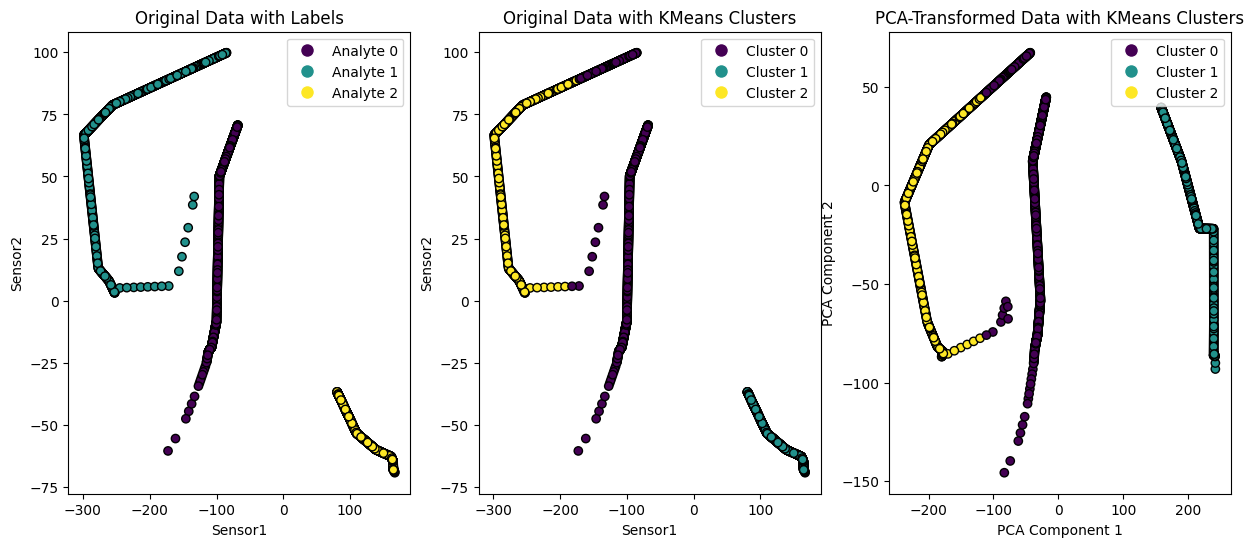

In [15]:
plot_clusters(features, data, pca_features, 'docs/plots/exponential_kmeans/Original_vs_PCA.png')

In [16]:
data['Cluster_Original'] = data['Cluster_Original'].replace({0: 0, 1: 2, 2: 1})
data['Cluster_PCA'] = data['Cluster_PCA'].replace({0: 0, 1: 2, 2: 1})

value_counts_df = pd.DataFrame({
    'Label': data['Label'].value_counts(),
    'Cluster_Original': data['Cluster_Original'].value_counts(),
    'Cluster_PCA': data['Cluster_PCA'].value_counts()
}).transpose()

value_counts_df

,0,1,2
Label,1022,1022,1022
Cluster_Original,1294,750,1022
Cluster_PCA,1281,763,1022


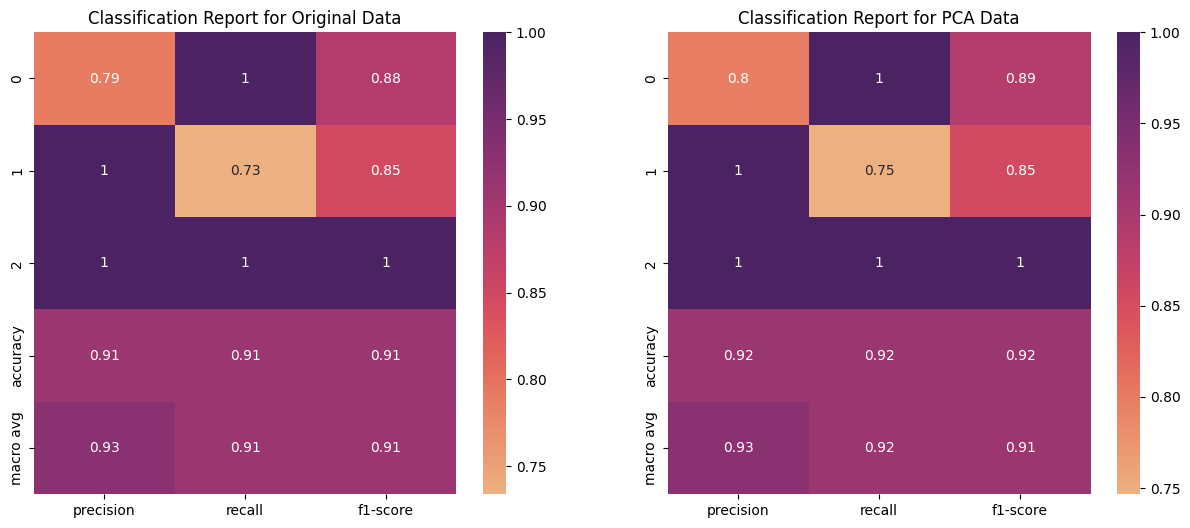

In [17]:
report_original = classification_report(data['Label'], data['Cluster_Original'], output_dict=True)
report_pca = classification_report(data['Label'], data['Cluster_PCA'], output_dict=True)

report_original_df = pd.DataFrame(report_original).transpose()
report_pca_df = pd.DataFrame(report_pca).transpose()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(report_original_df.iloc[:-1, :-1], annot=True, cmap='flare', ax=axes[0])
axes[0].set_title('Classification Report for Original Data')

sns.heatmap(report_pca_df.iloc[:-1, :-1], annot=True, cmap='flare', ax=axes[1])
axes[1].set_title('Classification Report for PCA Data')

plt.show()


## With Standard Scaling Results

In [18]:
features = data[['Sensor1', 'Sensor2', 'Sensor3']]
labels = data['Label']

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(features)
data['Cluster_Original'] = kmeans_original.labels_

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_features)
data['Cluster_PCA'] = kmeans_pca.labels_

In [19]:
comparison_original = pd.crosstab(data['Label'], data['Cluster_Original'], rownames=['Actual'], colnames=['Cluster'])
print("Comparison for Original Data:")
print(comparison_original)

comparison_pca = pd.crosstab(data['Label'], data['Cluster_PCA'], rownames=['Actual'], colnames=['Cluster'])
print("\nComparison for PCA-Transformed Data:")
print(comparison_pca)

Comparison for Original Data:
Cluster    0    1    2
Actual                
0        606  416    0
1        859  163    0
2          0   92  930

Comparison for PCA-Transformed Data:
Cluster    0    1    2
Actual                
0        603    0  419
1        866    0  156
2          0  930   92


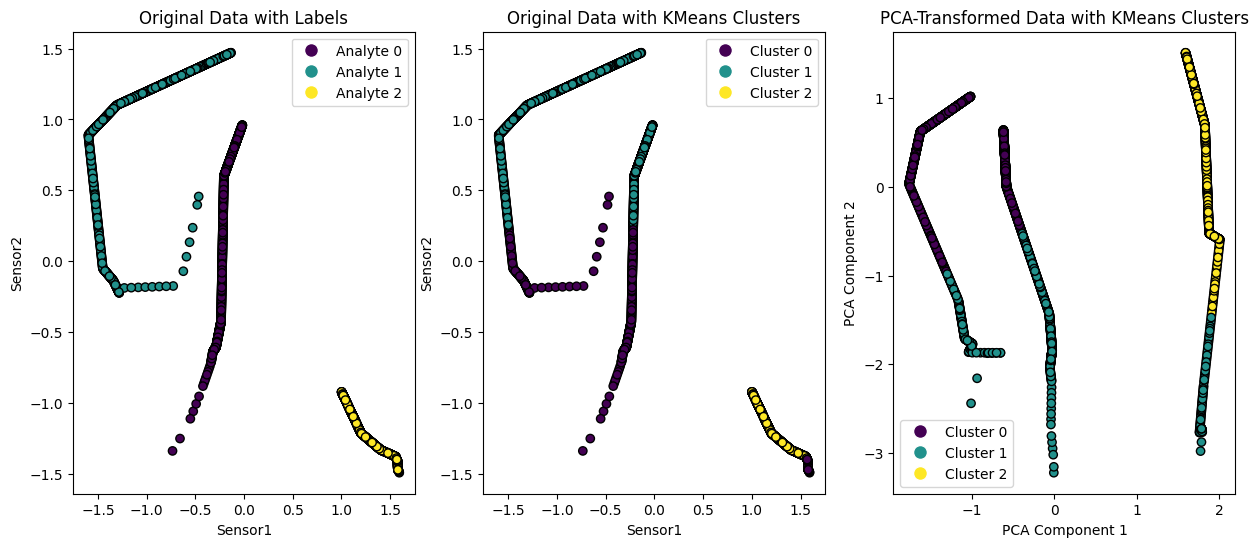

In [23]:
plot_clusters(features, data, pca_features, 'docs/plots/exponential_kmeans/Original_vs_PCA_scaled.png')

In [21]:
data['Cluster_Original'] = data['Cluster_Original'].replace({0: 1, 1: 0, 2: 2})
data['Cluster_PCA'] = data['Cluster_PCA'].replace({0: 0, 1: 2, 2: 1})

value_counts_df = pd.DataFrame({
    'Label': data['Label'].value_counts(),
    'Cluster_Original': data['Cluster_Original'].value_counts(),
    'Cluster_PCA': data['Cluster_PCA'].value_counts()
}).transpose()

value_counts_df

,0,1,2
Label,1022,1022,1022
Cluster_Original,671,1465,930
Cluster_PCA,1469,667,930


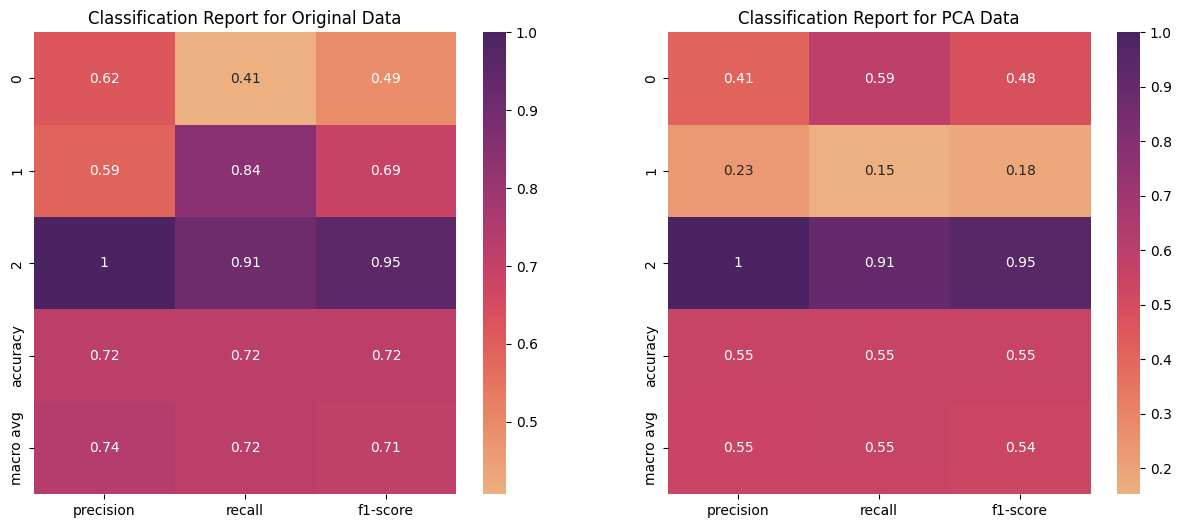

In [22]:
report_original = classification_report(data['Label'], data['Cluster_Original'], output_dict=True)
report_pca = classification_report(data['Label'], data['Cluster_PCA'], output_dict=True)

report_original_df = pd.DataFrame(report_original).transpose()
report_pca_df = pd.DataFrame(report_pca).transpose()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(report_original_df.iloc[:-1, :-1], annot=True, cmap='flare', ax=axes[0])
axes[0].set_title('Classification Report for Original Data')

sns.heatmap(report_pca_df.iloc[:-1, :-1], annot=True, cmap='flare', ax=axes[1])
axes[1].set_title('Classification Report for PCA Data')

plt.show()